In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
print(len(mnist_train))
print(len(mnist_test))


100%|██████████| 26421880/26421880 [00:11<00:00, 2262039.80it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 145953.89it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:04<00:00, 917783.96it/s] 


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5154518.26it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw

60000
10000


In [2]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [3]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
    'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [40]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
print(X.shape, y.shape)


torch.Size([18, 1, 28, 28]) torch.Size([18])


In [34]:
X = X.reshape(18, 28, 28)

In [19]:
import matplotlib.pyplot as plt

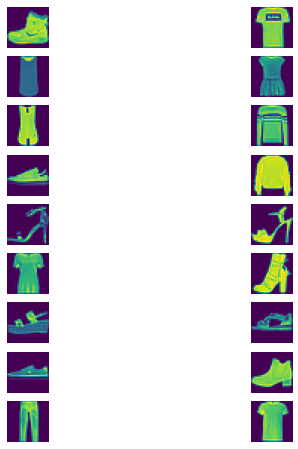

In [38]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 9
for i in range(0, cols * rows):
    img, label = X[i], y[i]
    figure.add_subplot(rows, cols, i+1)
    plt.axis("off")
    plt.imshow(img.numpy())
plt.show()

In [41]:
batch_size = 256
def get_dataloader_workers():
    return 4
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

In [43]:
for X, y in train_iter:
    continue

In [47]:
print(type(mnist_train))

<class 'torchvision.datasets.mnist.FashionMNIST'>


In [49]:
def load_data_fashion_mnist(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test, batch_size, shuffle=False,
    num_workers=get_dataloader_workers()))


In [50]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [52]:
import torch
from IPython import display


In [53]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [54]:
num_inputs = 784
num_outputs = 10

In [55]:
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


In [56]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [60]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [61]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.2804, 0.3050, 0.1094, 0.2298, 0.0755],
         [0.1157, 0.1168, 0.3218, 0.2915, 0.1541]]),
 tensor([1.0000, 1.0000]))

In [62]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [67]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]


tensor([0.1000, 0.5000])

In [69]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [73]:
y_hat[range(len(y_hat)), y]

tensor([0.1000, 0.5000])

In [75]:
def accuracy(y_hat, y): #@save
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())


In [92]:
t = torch.tensor([0, 0.8, 2.1])
t = t.reshape(-1, t.shape[0])
print(t.shape)
t.argmax(1)

torch.Size([1, 3])


tensor([2])

In [93]:
accuracy(y_hat, y) / len(y)


0.5

简洁实现

In [95]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)


In [98]:
net = torch.nn.Sequential(torch.nn.Flatten(), 
torch.nn.Linear(784, 10)
)
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal(m.weight, std=0.01) # 将线性层初始化
net.apply(init_weights)  # 将线性层初始化

<ipython-input-98-48b48f6f4054>:6: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(m.weight, std=0.01) # 将线性层初始化


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [100]:
loss = torch.nn.CrossEntropyLoss()

In [101]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

In [103]:
num_epochs = 10

In [109]:
for i in range(num_epochs):
    r = 0
    for X, y in train_iter:
        l = loss(net(X), y)
        r += l
        trainer.zero_grad()
        l.backward()
        trainer.step()  # 进行梯度更新

    print(r)

tensor(98.2232, grad_fn=<AddBackward0>)
tensor(97.8782, grad_fn=<AddBackward0>)
tensor(97.5559, grad_fn=<AddBackward0>)
tensor(97.0601, grad_fn=<AddBackward0>)
tensor(96.8662, grad_fn=<AddBackward0>)
tensor(96.5279, grad_fn=<AddBackward0>)
tensor(96.2490, grad_fn=<AddBackward0>)
tensor(95.9864, grad_fn=<AddBackward0>)
tensor(95.7692, grad_fn=<AddBackward0>)
tensor(95.5613, grad_fn=<AddBackward0>)


In [117]:
print(x.detach().size())

torch.Size([160])


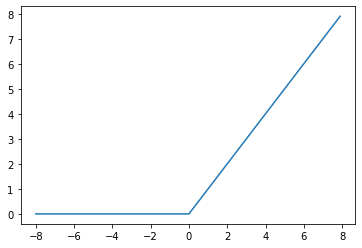

In [114]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
x.size()
y = torch.relu(x)
plt.plot(x.detach(), y.detach())

In [118]:
y.backward(torch.ones_like(x), retain_graph = True)


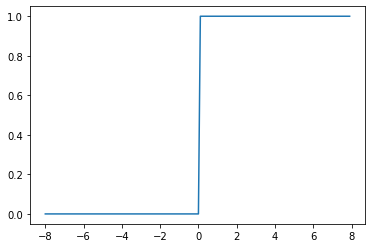

In [119]:
plt.plot(x.detach(), x.grad)

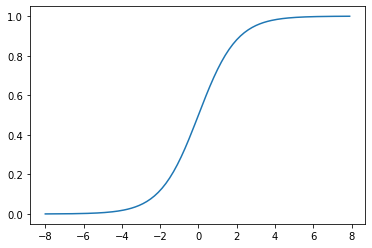

In [120]:
y = torch.sigmoid(x)
plt.plot(x.detach(), y.detach())

In [122]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)

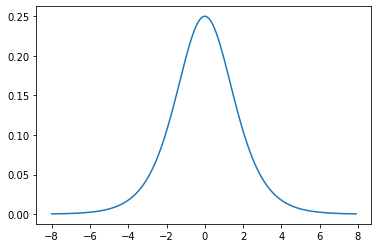

In [123]:
plt.plot(x.detach(), x.grad)

In [124]:
t = torch.randn(2, 3, 4, 5)

In [137]:
a = torch.randn(8,3,64,64)
F = torch.nn.Flatten()
a1 = F(a)
a1.shape

torch.Size([8, 12288])

In [139]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [140]:
X.shape

torch.Size([96, 1, 28, 28])